# _HDIP Data Analytics_ 

### Data Visualization Techniques  
Lecturer(s): David McQuaid 

Submission Deadline Date: 20/10/2023 11:55pm  

Student: **_Bárbara Abreu Costa 2023099_**

GitHub Repository: https://github.com/Babreucosta/CA1_DataVisTech.git

*******

### Scenario:  
  
_You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season._
  
_Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python._ 
   
_The companies CTO also requires you to rationalize all the decisions that you have made in your report._  
  
_This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant._



### Requirements  
  
_You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:_
  
###### Part 1: (Column Names are denoted by quotation marks)  (30 marks)
  
_•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?_ 

###### Part 2  (20 marks)
  
_•	You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario._

###### Part3:  (50 marks)
  
_You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)_
  
_All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).  You must also provide a PDF copy of your Jupyter Notebook for dissemination._  



### Data Dictionary


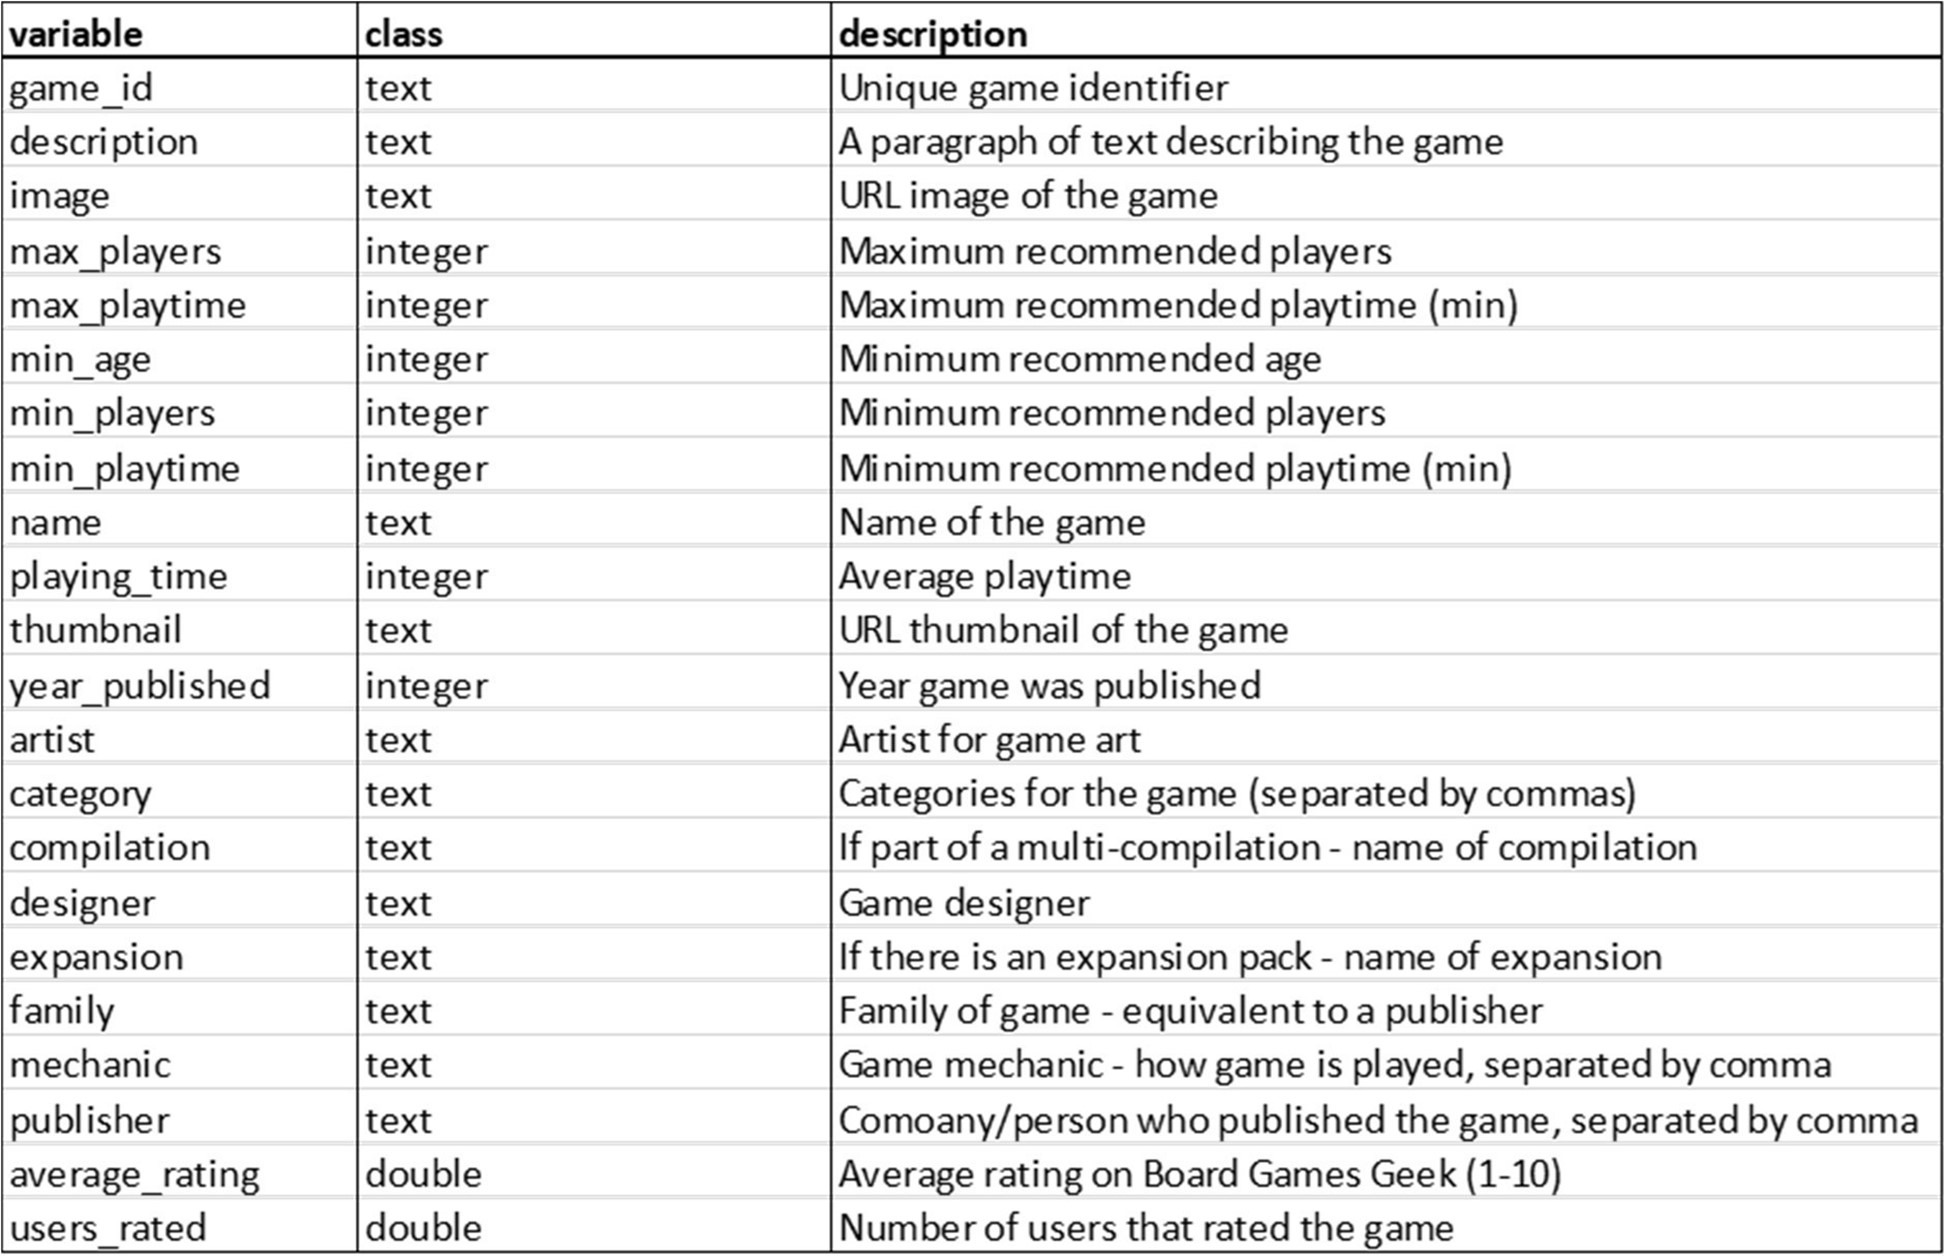

In [1]:
from IPython.display import Image
image_path = 'dictionary.jpg' 
Image(filename=image_path)

*******

# _BOARD GAMES_

*A Review of the Board Games Business*
 
    Acoording to market research companies Technavio and Imarc, the global board game market has an estimated value between U$11 billion and U$13.4 billion and is projected to grow by about 7 to 11 percent within the next 5 years.
    Over 3.000 new games are released each year (excluding expansion packs), according to the website and online forum 'BoardGameGeek', wich aims to log every game published. 
    For business in this industry, the *winter season* which is marked by cozy get-togethers and festive celebrations, gives a wonderful chance to take advantage of the increased demand for entertainment. 
    Understanding the diverse categories and mechanics of board games is crucial for devising a successful marketing strategy.  A study can be useful to explore the importance of this knowledge, shedding light on how it can be turned to carve out a profitable niche in the bustling winter board games market. 

    To conduct this analysis I decided to structure an approach starting with an general undertanding of the data. That initial stage will involve loading the dataset, its structure to well undertanding and check if there is any missing values. Where appropriate, I'll also trying to engineer features that can improve the dataset.

##### Load the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
board_games = pd.read_csv('board_games.csv')
board_games.head()

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

##### Understand its structure

In [4]:
board_games.shape

(10532, 22)

In [5]:
board_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

##### Check for missing values

In [6]:
board_games.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

##### Hadling missing values
    I decided to input all the missing values with "Not Mentioned"

In [7]:
board_games['artist'] = board_games['artist'].fillna("Not Mentioned")
board_games['category'] = board_games['category'].fillna("Not Mentioned")
board_games['compilation'] = board_games['compilation'].fillna("Not Mentioned")
board_games['designer'] = board_games['designer'].fillna("Not Mentioned")
board_games['expansion'] = board_games['expansion'].fillna("Not Mentioned")
board_games['family'] = board_games['family'].fillna("Not Mentioned")
board_games['mechanic'] = board_games['mechanic'].fillna("Not Mentioned")
board_games['publisher'] = board_games['publisher'].fillna("Not Mentioned")

In [8]:
# explore / write about all missing values

In [9]:
board_games.describe()

game_id   max_players  max_playtime       min_age   min_players  \
count   10532.000000  10532.000000  10532.000000  10532.000000  10532.000000   
mean    62059.203095      5.657330     91.341436      9.714964      2.070547   
std     66223.716828     18.884403    659.754400      3.451226      0.664394   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      5444.500000      4.000000     30.000000      8.000000      2.000000   
50%     28822.500000      4.000000     45.000000     10.000000      2.000000   
75%    126409.500000      6.000000     90.000000     12.000000      2.000000   
max    216725.000000    999.000000  60000.000000     42.000000      9.000000   

       min_playtime  playing_time  year_published  average_rating  \
count  10532.000000  10532.000000    10532.000000    10532.000000   
mean      80.882738     91.341436     2003.070832        6.370856   
std      637.873893    659.754400       12.278296        0.850364   
min        0.000000      0.000000     1950.000000        1.384210   
25%       25.000000     30.000000     1998.000000        5.829585   
50%       45.000000     45.000000     2007.000000        6.392965   
75%       90.000000     90.000000     2012.000000        6.942675   
max    60000.000000  60000.000000     2016.000000        9.003920   

        users_rated  
count  10532.000000  
mean     870.081466  
std     2880.214998  
min       50.000000  
25%       85.000000  
50%      176.000000  
75%      518.000000  
max    67655.000000

In [10]:
board_games.describe(include=object) 

description  \
count                                               10532   
unique                                              10528   
top     How could that have happened? Black Stories ar...   
freq                                                    3   

                                               image        name  \
count                                          10531       10532   
unique                                         10527       10357   
top     //cf.geekdo-images.com/images/pic2410035.png  Robin Hood   
freq                                               2           5   

                                             thumbnail         artist  \
count                                            10531          10532   
unique                                           10527           4642   
top     //cf.geekdo-images.com/images/pic2410035_t.png  Not Mentioned   
freq                                                 2           2773   

                    category    compilation      designer      expansion  \
count                  10532          10532         10532          10532   
unique                  3861            337          4679           2635   
top     Wargame,World War II  Not Mentioned  (Uncredited)  Not Mentioned   
freq                     449          10122           558           7780   

               family       mechanic  publisher  
count           10532          10532      10532  
unique           3919           3210       5513  
top     Not Mentioned  Not Mentioned  GMT Games  
freq             2808            950        180

##### Exploratory Data Analysis (EDA):
    
    - Understand the distribution of key variables.
    - Identify any trends or patterns in the data.
    - Visualize summary statistics.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

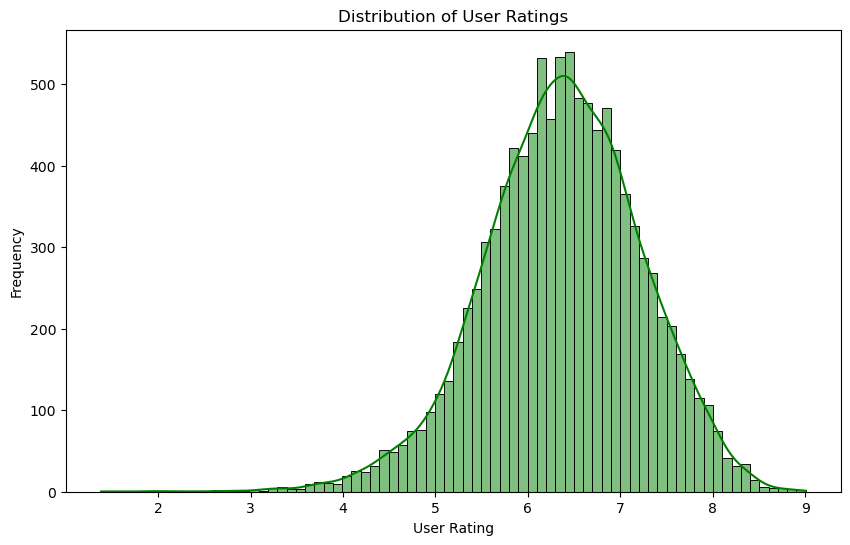

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(board_games['average_rating'], kde=True, color='green')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

**Distribuition of user ratings**
    
    By analysing the distribuition of user ratings we can indentify trends indicating which games are well-liked and which may need to be improved, so it will be crucial in providing us with insights into how diffent board games are received by the gaming community. 
    This information can give to the industry experts a competitve edge and enables them to make datadriven decision that appeal to a wide range of gaming audiances. 
    So, first of all I decided of utilizing a histogram with a kernel density estimate overlay that gives the dsitribution of user ratings a clear and plain visual depiction. This graphical method successfully conveys the range of ratings and makes it simple for staekholders to understand. 
      Analysing the plot above - where 1 might represent a very low rating and 10 might represent a perfect rating - is possible to see the highest bars are between 6 and 7 that indicate that the majority of board games in the dataset have received user ratings within this range.
    This distribution could imply there is a cluster of games that are considered good or satisfactory by most users, however there may be a lack of games that are considered exceptional or subpar according to the ratings. This information could be valuable for game developers, publishers, and distributors as it provides insights into the general sentiment of the gaming community towards the board games in question. They may use this information to refine existing games or make decisions regarding future game development and marketing strategies.

--------

#####  •  What are the top 5 “average rated” games?  

In [14]:
top_rated_games = board_games.sort_values(by='average_rating', ascending=False).head(5)
top_rated_games[['name', 'average_rating']]

name  average_rating
8348                     Small World Designer Edition         9.00392
6392                           Kingdom Death: Monster         8.93184
9964                           Terra Mystica: Big Box         8.84862
8526                          Last Chance for Victory         8.84603
9675  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081

     Above we have a table with the names of the top 5 games
     
        To find the games with the highest average ratings I decided to order the dataset by 'average_rating' in descending order. The names and ratings are displayed toghether to give a clear and concise piscture of the best-rated game - Small World Designer Edition.
        By the result, stakeholders will be able to essily see which game have the highest average ratings, which can be helpful when deciding which titles to emphasize in the sales plan.

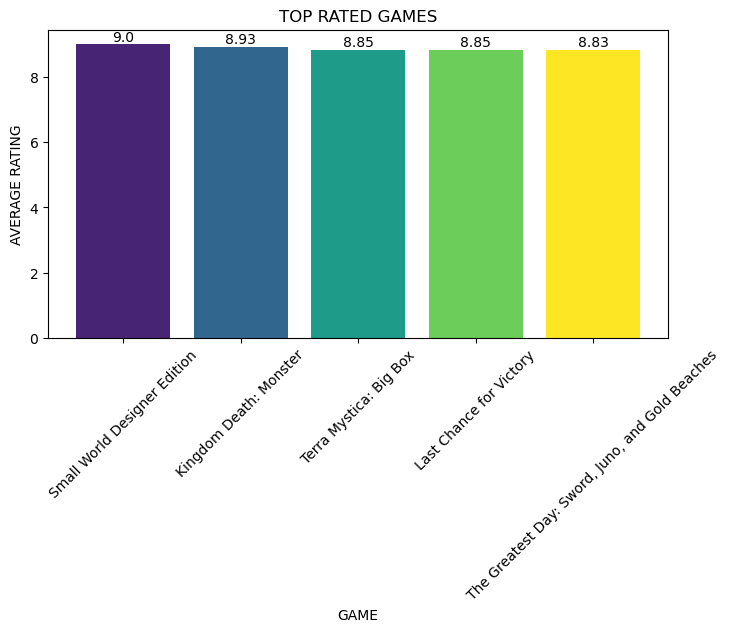

In [58]:
import matplotlib.pyplot as plt

# Data
games = top_rated_games['name']
ratings = top_rated_games['average_rating']

# Create a color palette
colors = plt.cm.viridis(np.linspace(0.1, 1, len(ratings)))

# Create a vertical bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(games, ratings, color=colors)

# Add percentages on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('GAME')
plt.ylabel('AVERAGE RATING')
plt.title('TOP RATED GAMES')
plt.xticks(rotation=45)
plt.show()

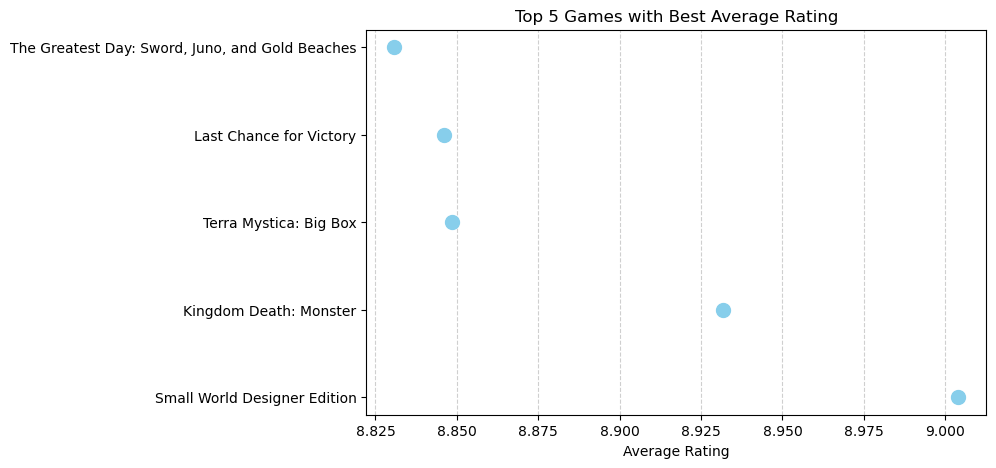

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(top_rated_games['average_rating'], top_rated_games['name'], 'o', markersize=10, color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 5 Games with Best Average Rating')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

-------

##### • Is there a correlation between “users_rated” and “max_playtime”?

    The Pearson correlation coefficient can be calculated to see if "users_rated" and "max_playtime" are correlated or not. The Pearson correlation coefficient calculates how linearly two variables are related.

In [17]:
correlation = board_games['users_rated'].corr(board_games['max_playtime'])
print(correlation)

-0.004341647333776705


# add explanation

    A correlation coefficent close to zero suggest that is little to no linear relationship between the two variables. 
    
    To visualize the correlation I have got in the previews output I decided to use a scatter plot becouse it allow us to observe those two continuous variables



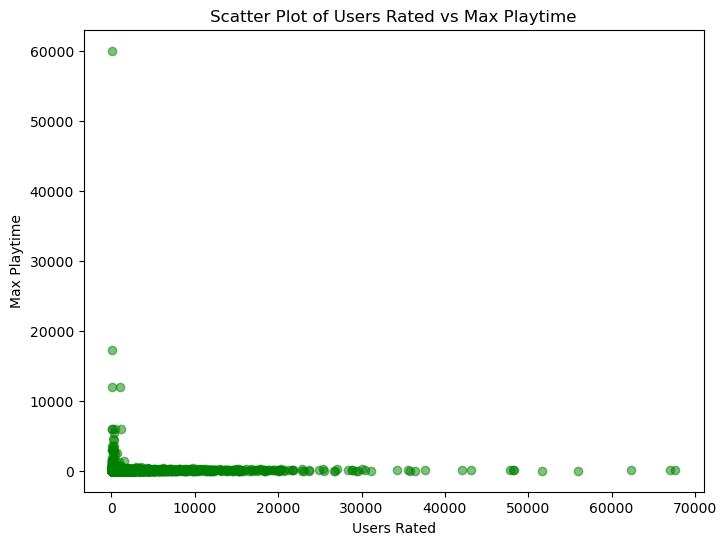

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(board_games['users_rated'], board_games['max_playtime'], alpha=0.5, c='green')
plt.title('Scatter Plot of Users Rated vs Max Playtime')
plt.xlabel('Users Rated')
plt.ylabel('Max Playtime')
plt.show()

--------

#####  •  What is the distribution of game categories? (You cannot use a bar chart)

In [20]:
category_counts = board_games['category'].value_counts()
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})
print(category_counts_df)

                                               Category  Count
0                                  Wargame,World War II    449
1                                             Card Game    438
2                                     Abstract Strategy    284
3                                    Napoleonic,Wargame    124
4                                              Economic    116
...                                                 ...    ...
3856                            Book,Fantasy,Miniatures      1
3857  Adventure,Card Game,Fantasy,Humor,Movies / TV ...      1
3858                   Card Game,Deduction,Print & Play      1
3859  Card Game,Collectible Components,Comic Book / ...      1
3860  Bluffing,Horror,Maze,Movies / TV / Radio theme...      1

[3861 rows x 2 columns]


In [21]:
import pandas as pd
import plotly.express as px

top_10_categories = category_counts_df.head(10)

fig = px.pie(top_10_categories, names='Category', values='Count', title='Top 10 Categories Distribution')
fig.show()

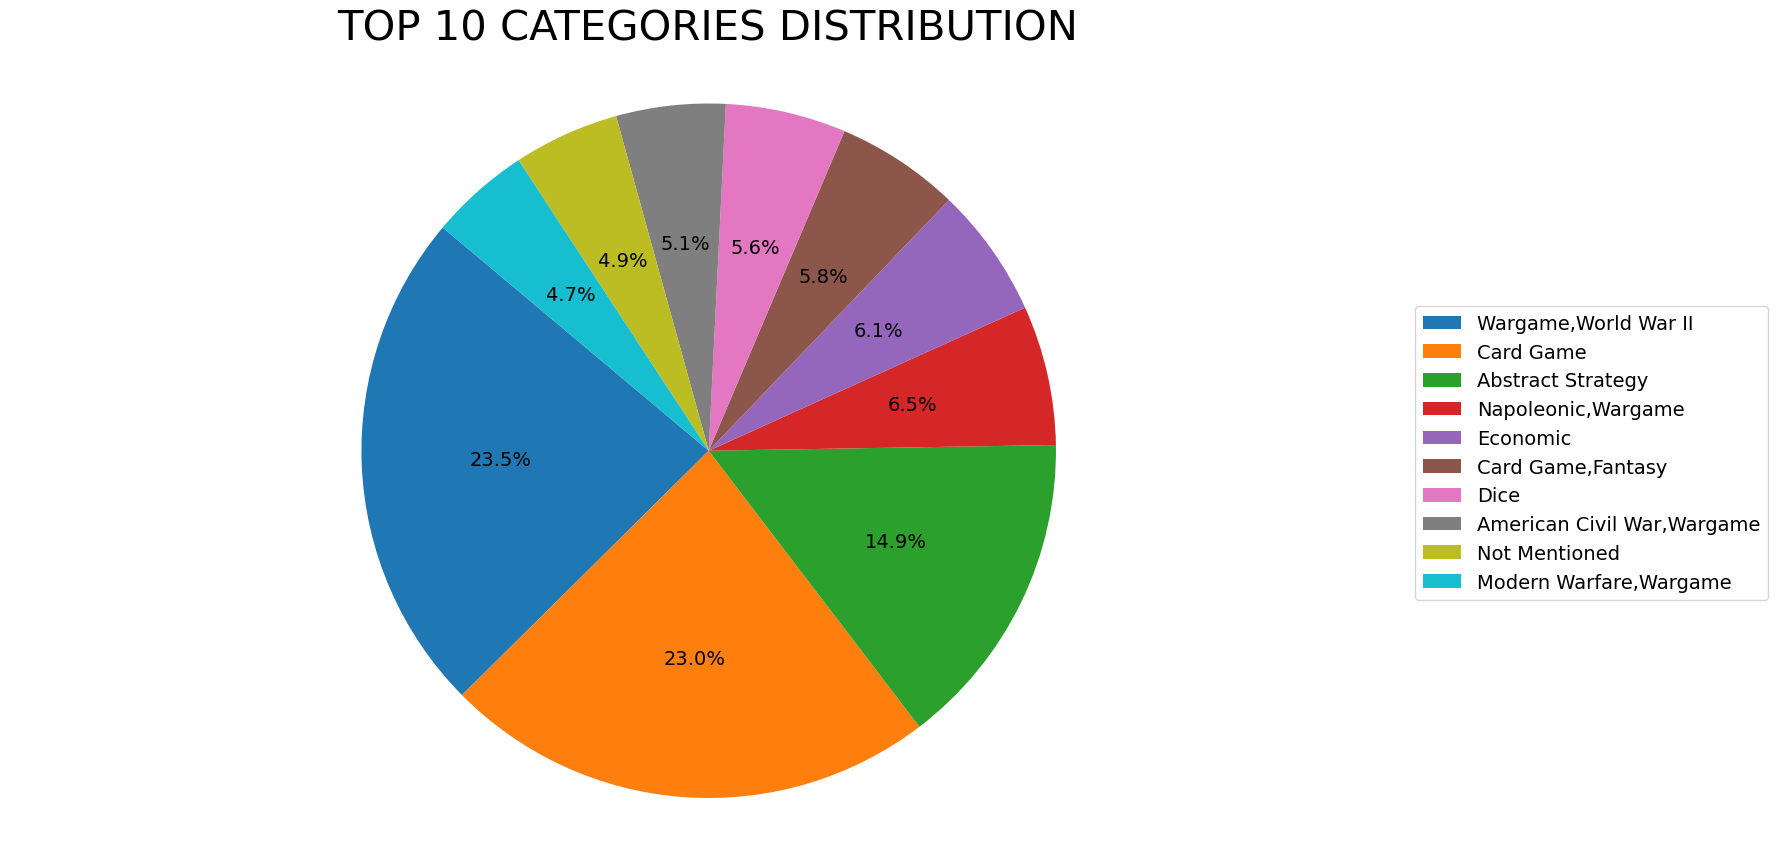

In [55]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'top_10_categories' with 'Category' and 'Count' columns
top_10_categories = category_counts_df.head(10)

# Define custom colors to match the Plotly Express colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Increase the title distance (pad) and adjust the figure size
plt.figure(figsize=(18, 10))
plt.title('TOP 10 CATEGORIES DISTRIBUTION', pad=20, fontsize=30)  # Increase the pad value and adjust fontsize as needed

# Create a pie chart with custom colors, remove labels, and adjust percentage size
wedges, texts, autotexts = plt.pie(top_10_categories['Count'], autopct='%1.1f%%', startangle=140, colors=custom_colors,
                                   labels=['' for _ in top_10_categories['Category']])  # Remove labels

# Adjust the percentage size inside the pie
for autotext in autotexts:
    autotext.set_fontsize(14)  # Adjust fontsize as needed

# Create a legend box beside the pie plot
plt.legend(wedges, top_10_categories['Category'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

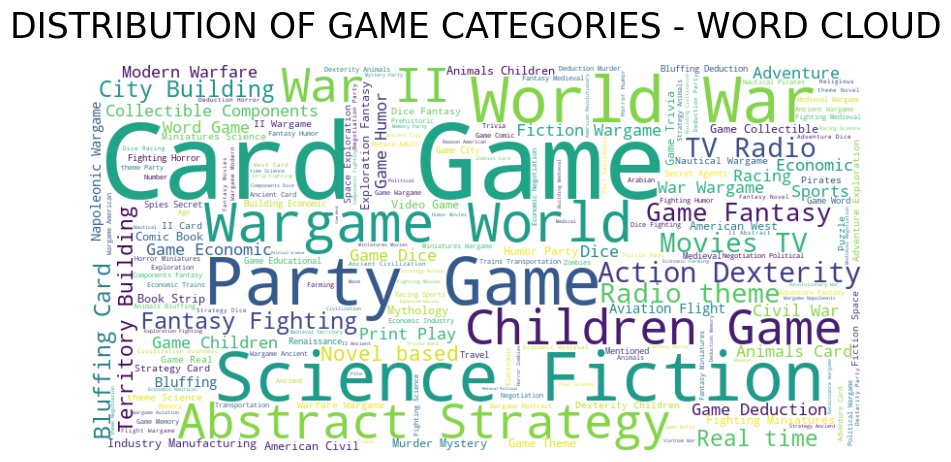

In [54]:
# Combine all category strings into a single string
all_categories = ','.join(board_games['category'].dropna())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('DISTRIBUTION OF GAME CATEGORIES - WORD CLOUD', pad=20, fontsize=25)
plt.show()

--------

##### • Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

    To determine if older games (released in 1992 and earlier) have a higher median "average rating" than newer games I will fisrt split the data into those two groups. 

In [25]:
older_games = board_games[board_games['year_published'] <= 1992]
newer_games = board_games[board_games['year_published'] > 1992]

    Now I will find the median "average rating" for each group.

In [26]:
median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

    And finally I can print and compare the Medians 

In [27]:
print(median_rating_older, median_rating_newer)

6.08812 6.462915


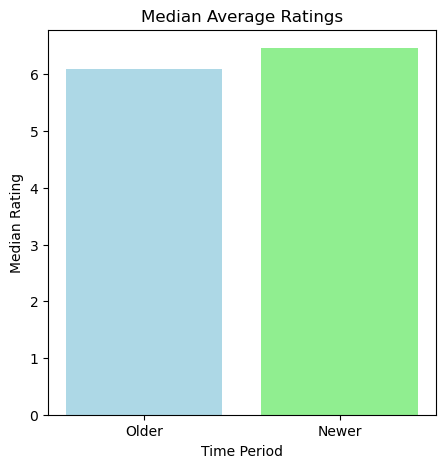

In [28]:
labels = ['Older', 'Newer']
values = [median_rating_older, median_rating_newer]

plt.figure(figsize=(5, 5))
plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.title('Median Average Ratings')
plt.xlabel('Time Period')
plt.ylabel('Median Rating')
plt.show()

    By comparing the median average ratings of older and newer games, we can gain insights into whether there is a trend in ratings based on the release year. This analysis can help inform decisions about which types of games may be more popular or well-received by the audience.
    As it shows in the result the median rating for older games (released in 1992 and earlier) is approximately 6.08812, compared the median rating for newer games (released after 1992) is approximately 6.462915. So that suggest in general newer games have a litlle higher median rating than older games. 
    It's crucial to remember that the difference between the median is quite small (under 0.4) - indicating that there MAY NOT be much of a substatial diffference in the overall quality or popularity among them.
    In the bussiness point of view I would say based on the generally positive ratings both have that there is potetial for sale.

--------

##### • What are the 5 most common “mechanics” in the dataset?  

    As we know from the previews output "mechanic" has 950 missing values. So I have decided replace NA values as "Not Mentioned".

In [29]:
board_games["mechanic"] = board_games["mechanic"].fillna("Not Mentioned")

    That collumn also have other particularites as a list of string values, values separeted by "," and "/". To exclued these I will be cleaning and forming a tokenized value.

In [30]:
import re

def Clean(Text):
    sms = re.sub('[^a-zA-Z], ,', ' ', str(Text))
    sms = sms.replace("/",",")
    sms = sms.split()
    sms = ' '.join(sms)
    return sms
board_games["mechanic"] = board_games["mechanic"].apply(Clean)

print("First 5 values of Mechanics after cleaning text:")
print(board_games["mechanic"][:5], "\n")

First 5 values of Mechanics after cleaning text:
0    Area Control , Area Influence,Auction,Bidding,...
1                                         Trick-taking
2    Area Control , Area Influence,Hand Management,...
3    Action Point Allowance System,Area Control , A...
4         Hand Management,Stock Holding,Tile Placement
Name: mechanic, dtype: object 



    Count the frequency of each game mechanic

In [31]:
common_mechanics = board_games['mechanic'].value_counts().head(6)
common_mechanics = common_mechanics[common_mechanics.index != "Not Mentioned"]

print("The 5 most common “mechanics” in the dataset are:")
common_mechanics

The 5 most common “mechanics” in the dataset are:


Hex-and-Counter         523
Hand Management         297
Dice Rolling            222
Roll , Spin and Move    199
Tile Placement          170
Name: mechanic, dtype: int64

    This information will may help stakeholders understand which game mechanics are most commonly associated with the board games. This knowledge can be valuable for making decision related to game selection and marketing strategies. 

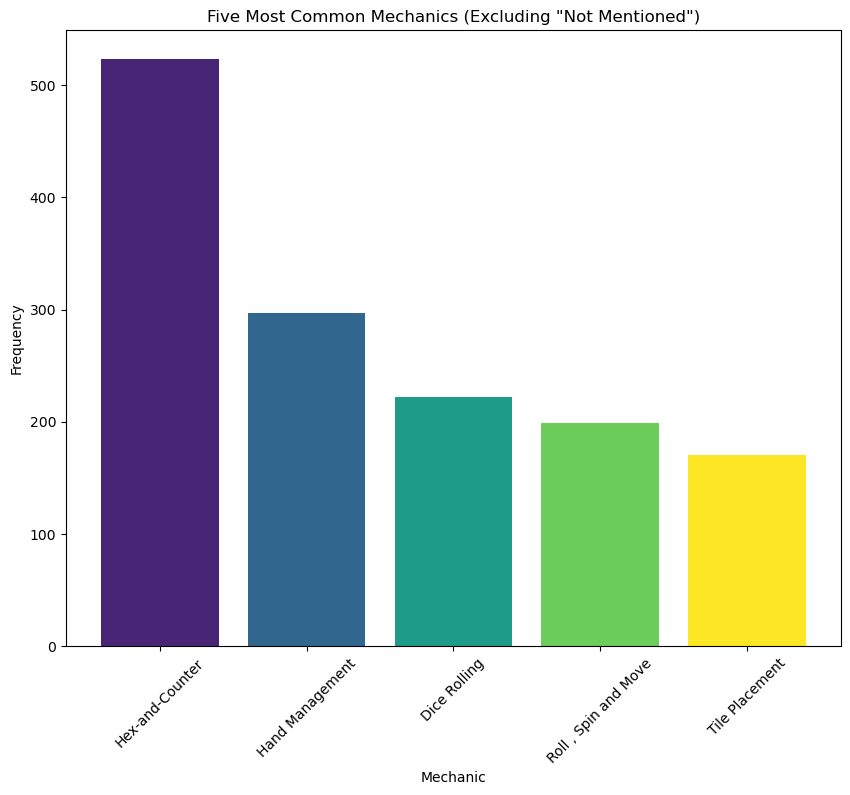

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Count the frequency of each game mechanic
common_mechanics = board_games['mechanic'].value_counts().head(6)

#Excluding "Not Mentioned" 
common_mechanics = common_mechanics[common_mechanics.index != "Not Mentioned"]

cmap = cm.get_cmap('viridis')

# Create a vertical bar chart with different colors
plt.figure(figsize=(10, 8))
plt.bar(common_mechanics.index, common_mechanics.values, color=colors)

plt.xlabel('Mechanic')
plt.ylabel('Frequency')
plt.title('Five Most Common Mechanics (Excluding "Not Mentioned")')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# PART 2

##### •	You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.

In [33]:
# Possible question 1: Is there any statistically signicant relationship btw the "avarege rating" and the "playing time" of bord games?

In [34]:
# Possible question 2: Does the "average rating" of games vary significantly between different "categories"?

# PART 3

##### • You must explain, in detail why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)

##### • Why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)



##### • What design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)


##### • What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)

REFERENCES ( TO EDIT LATER )

https://www.washingtonpost.com/business/2022/12/24/board-game-popularity/

